In [1]:
# Import the pandas library for df creation
import pandas as pd

# Import the NumPy library to use the random package
import numpy as np

# Import the matplotlib library, package pyplot for plotting
import matplotlib.pyplot as plt

# Import the seaborn library for plotting
import seaborn as sns

# Use magic function to render the figure in a notebook
%matplotlib inline

# Sets Generator type with a declared value of 100
rng = np.random.default_rng(100)

# Set number of samples based on number of births
numsam = 63739

Age

In [21]:
# Downloaded NPRS_Age.csv from CITE
age = pd.read_csv("Data/NPRS_Age.csv", nrows=10)

age

,Frequency,Total Births
0,Under 20,1102
1,20-24 Years,5178
2,25-29 Years,11391
3,30-34 Years,22947
4,35-39 Years,18728
5,40-44 Years,4101
6,45 Years and,292
7,Total,63739


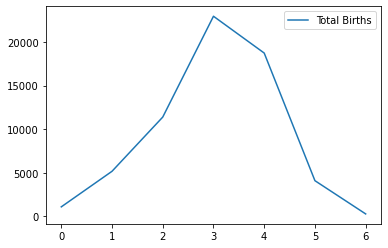

In [35]:
# drop last n rows
age = age[:-1]
# Plot 
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()

In [ ]:
# Here we are looking for a random array with a lower limit of 10 an upper limit of 100
# and 50 being the number that appears most frequently

Tria_1 = np.random.triangular(10, 50, 100) 
print ("Here is your triangular continuous random variable:\n % s" % (Tria_1)) # [55]